In [1]:
import numpy as np 
import pandas as pd 

import os
"""for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

file_path = os.path.join("mushrooms.csv")
print(file_path)

mushrooms.csv


# Importing Libraries

In [2]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, roc_curve, auc, confusion_matrix, classification_report

# Data Preprocessing

In [3]:
data = pd.read_csv(file_path)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
data.shape

(8124, 23)

In [8]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Converting string to integer

In [9]:
la = LabelEncoder()
for i in data.columns:
    data[i] = la.fit_transform(data[i])

Checking for class imbalancing

In [10]:
data['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

In [11]:
cor = data.corr()
rela = cor['class'].sort_values(ascending = False)
rela

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

<Axes: >

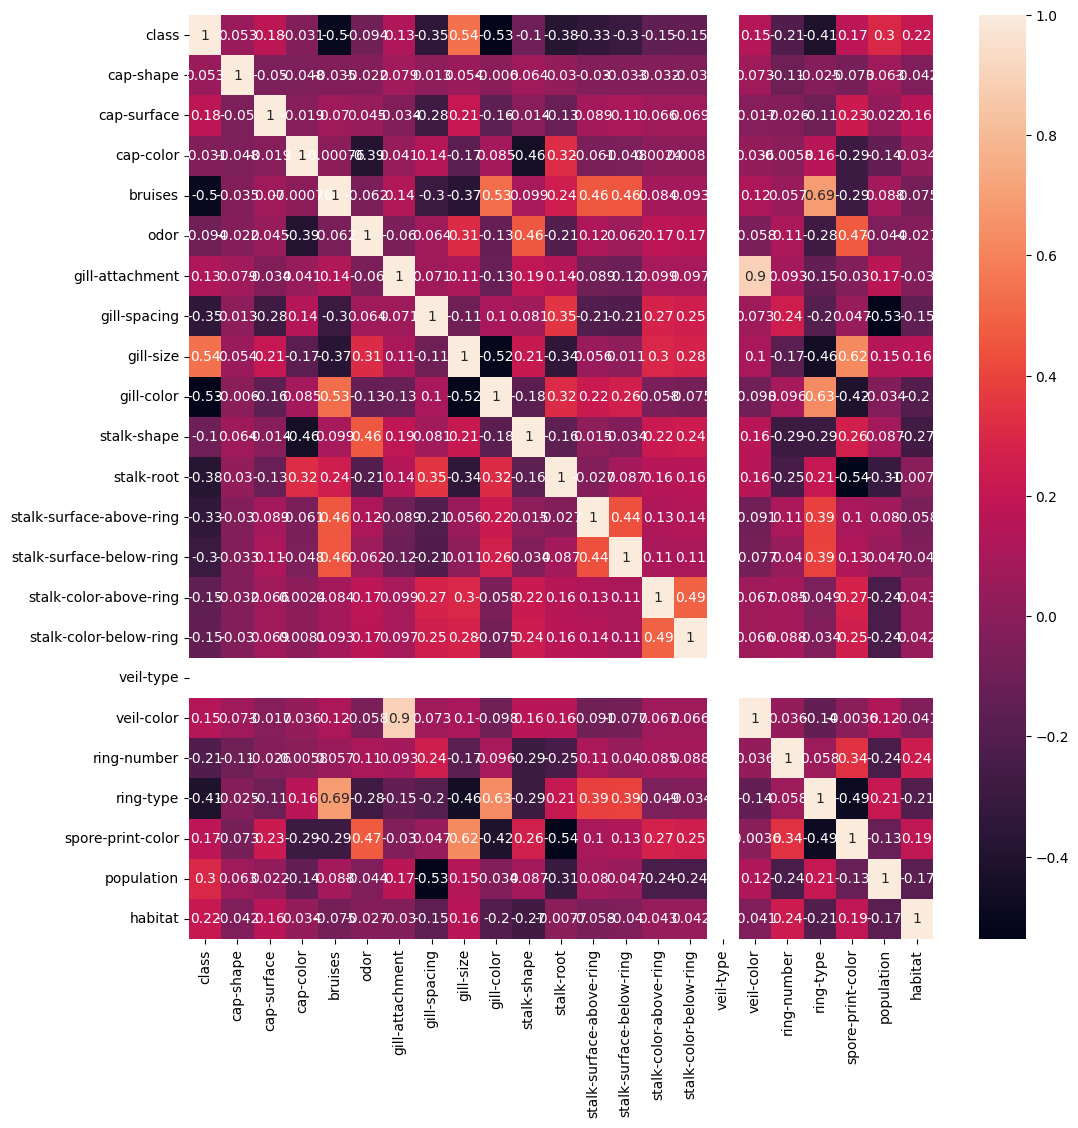

In [12]:
plt.subplots(figsize=(12, 12))
sns.heatmap(cor, annot = True)

In [13]:
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [14]:
data.drop('veil-type', inplace = True, axis=1)

# Designing Model

In [15]:
x= []
for i in range(len(rela)):
    if rela[i]>0:
        x.append(rela.index[i])
x

C:\Users\naris\AppData\Local\Temp\ipykernel_28276\3104785561.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if rela[i]>0:


['class',
 'gill-size',
 'population',
 'habitat',
 'cap-surface',
 'spore-print-color',
 'veil-color',
 'gill-attachment',
 'cap-shape']

In [16]:
x = data[x]
x.drop('class', inplace = True, axis = 1)
x

C:\Users\naris\AppData\Local\Temp\ipykernel_28276\3150919258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('class', inplace = True, axis = 1)


,gill-size,population,habitat,cap-surface,spore-print-color,veil-color,gill-attachment,cap-shape
0,1,3,5,2,2,2,1,5
1,0,2,1,2,3,2,1,5
2,0,2,3,2,3,2,1,0
3,1,3,5,3,2,2,1,5
4,0,0,1,2,3,2,1,5
...,...,...,...,...,...,...,...,...
8119,0,1,2,2,0,1,0,3
8120,0,4,2,2,0,0,0,5
8121,0,1,2,2,0,1,0,2
8122,1,4,2,3,7,2,1,3


In [17]:
y = data['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=42)

In [19]:
results = pd.DataFrame()
Name = []
Accuracy = []

# Applying RandomForest

In [20]:
cla = RandomForestClassifier(n_estimators = 10, random_state = 42)
cla.fit(xtrain, ytrain)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Making predictions on testing data

In [21]:
predicted = cla.predict(xtest)
predicted

array([0, 1, 1, ..., 0, 0, 1], shape=(2031,))

Calculating Accuracy

In [22]:
print("Accuracy score usign Random Forrest is: {}%".format(accuracy_score(ytest, predicted)*100))

Accuracy score usign Random Forrest is: 99.35992122107336%


In [23]:
Name.append('RandomForrest()')
Accuracy.append(accuracy_score(ytest, predicted)*100)

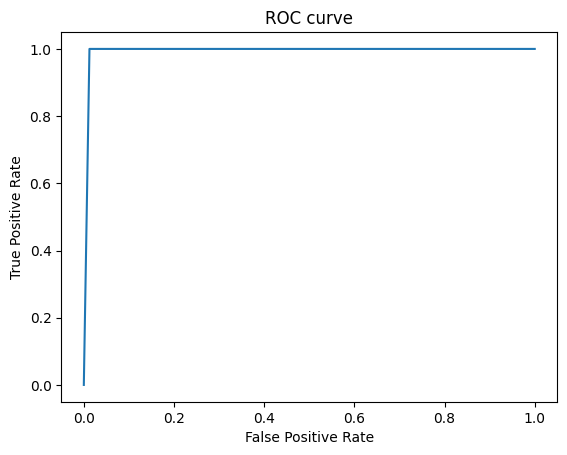

AUC value is 0.99375 


In [24]:
fpr, tpr, threshold= roc_curve(ytest, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

<Axes: >

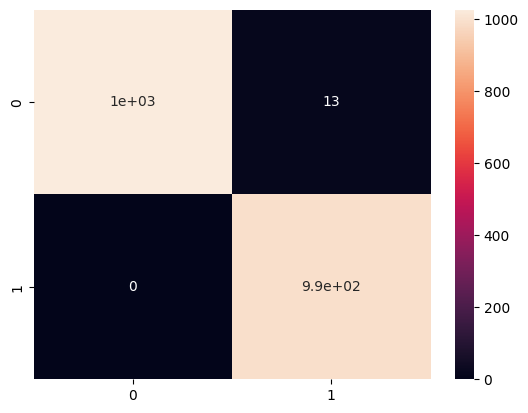

In [25]:
confu = confusion_matrix(ytest, predicted, labels = [0,1])
sns.heatmap(confu, annot=True)

In [26]:
print("Classification Report for our model is ")
print(classification_report(ytest, predicted))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1040
           1       0.99      1.00      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



# Applying Decision Tree

In [27]:
dst = DecisionTreeClassifier()
dst.fit(xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
predicted = dst.predict(xtest)
predicted

array([0, 1, 1, ..., 0, 0, 1], shape=(2031,))

In [29]:
print("Accuracy score using Decision Tree is: {}%".format(accuracy_score(ytest, predicted)*100))

Accuracy score using Decision Tree is: 99.35992122107336%


In [30]:
Name.append(dst)
Accuracy.append(accuracy_score(ytest, predicted)*100)

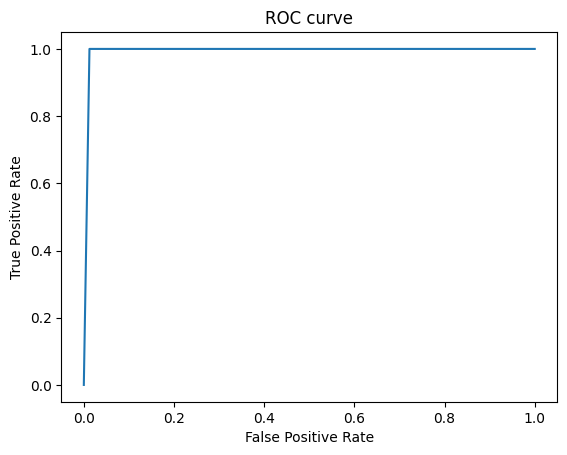

AUC value is 0.99375 


In [31]:
fpr, tpr, threshold= roc_curve(ytest, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

<Axes: >

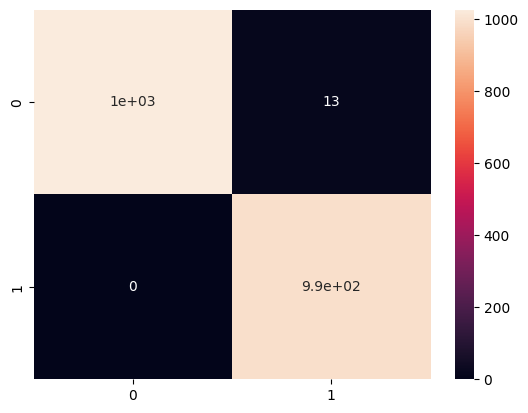

In [32]:
confu = confusion_matrix(ytest, predicted, labels = [0,1])
sns.heatmap(confu, annot=True)

In [33]:
print("Classification Report for our model is ")
print(classification_report(ytest, predicted))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1040
           1       0.99      1.00      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



# Applying Logistic Regression

In [34]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
predicted = lr.predict(xtest)
predicted

array([0, 1, 1, ..., 0, 0, 1], shape=(2031,))

In [36]:
print("Accuracy score using Logistic Regression is: {}%".format(accuracy_score(ytest, predicted)*100))

Accuracy score using Logistic Regression is: 84.83505662235352%


In [37]:
Name.append(lr)
Accuracy.append(accuracy_score(ytest, predicted)*100)

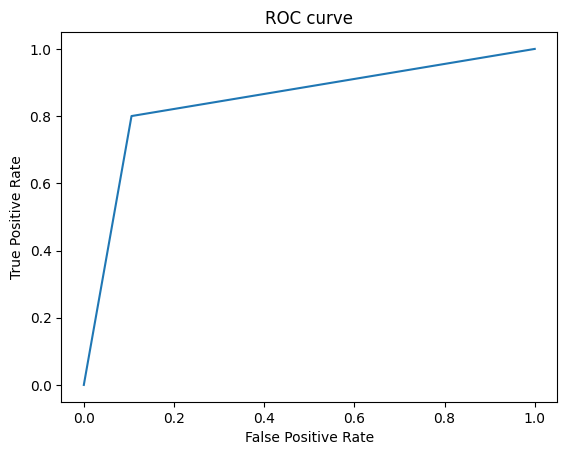

AUC value is 0.8472162927889466 


In [38]:
fpr, tpr, threshold= roc_curve(ytest, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

<Axes: >

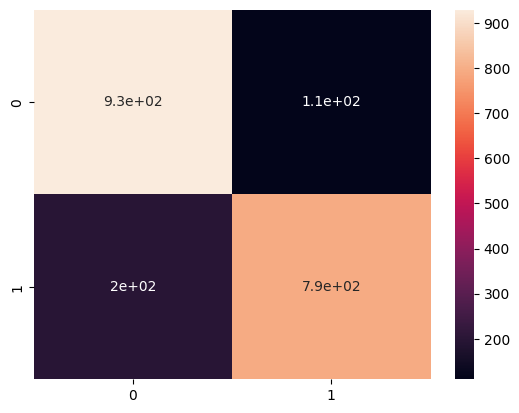

In [39]:
confu = confusion_matrix(ytest, predicted, labels = [0,1])
sns.heatmap(confu, annot=True)

In [40]:
print("Classification Report for our model is ")
print(classification_report(ytest, predicted))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1040
           1       0.88      0.80      0.84       991

    accuracy                           0.85      2031
   macro avg       0.85      0.85      0.85      2031
weighted avg       0.85      0.85      0.85      2031



# Final results are:

In [41]:
results['Name'] = Name
results['Accuracy'] = Accuracy
results

,Name,Accuracy
0,RandomForrest(),99.359921
1,DecisionTreeClassifier(),99.359921
2,LogisticRegression(),84.835057
